## 단층 퍼셉트론 기반 선형 회귀 모델

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/fetch_california_housing.csv")
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [3]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


MedInc (Median Income): 중간 소득을 나타내며, 단위는 10,000달러입니다.  
HouseAge (House Age): 주택의 나이를 나타내며, 단위는 연도입니다.  
AveRooms (Average Rooms): 평균 방 개수를 나타냅니다.  
AveBedrms (Average Bedrooms): 평균 침실 개수를 나타냅니다.  
Population: 각 구역의 인구 수를 나타냅니다.  
AveOccup (Average Occupancy): 가구당 평균 거주자 수를 나타냅니다.  
Latitude: 각 구역의 위도를 나타냅니다.  
Longitude: 각 구역의 경도를 나타냅니다.  
MedHouseVal (Median House Value): 중간 주택 가치를  나타내며, 단위는 10,000달러입니다.  
= <= Target

In [4]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


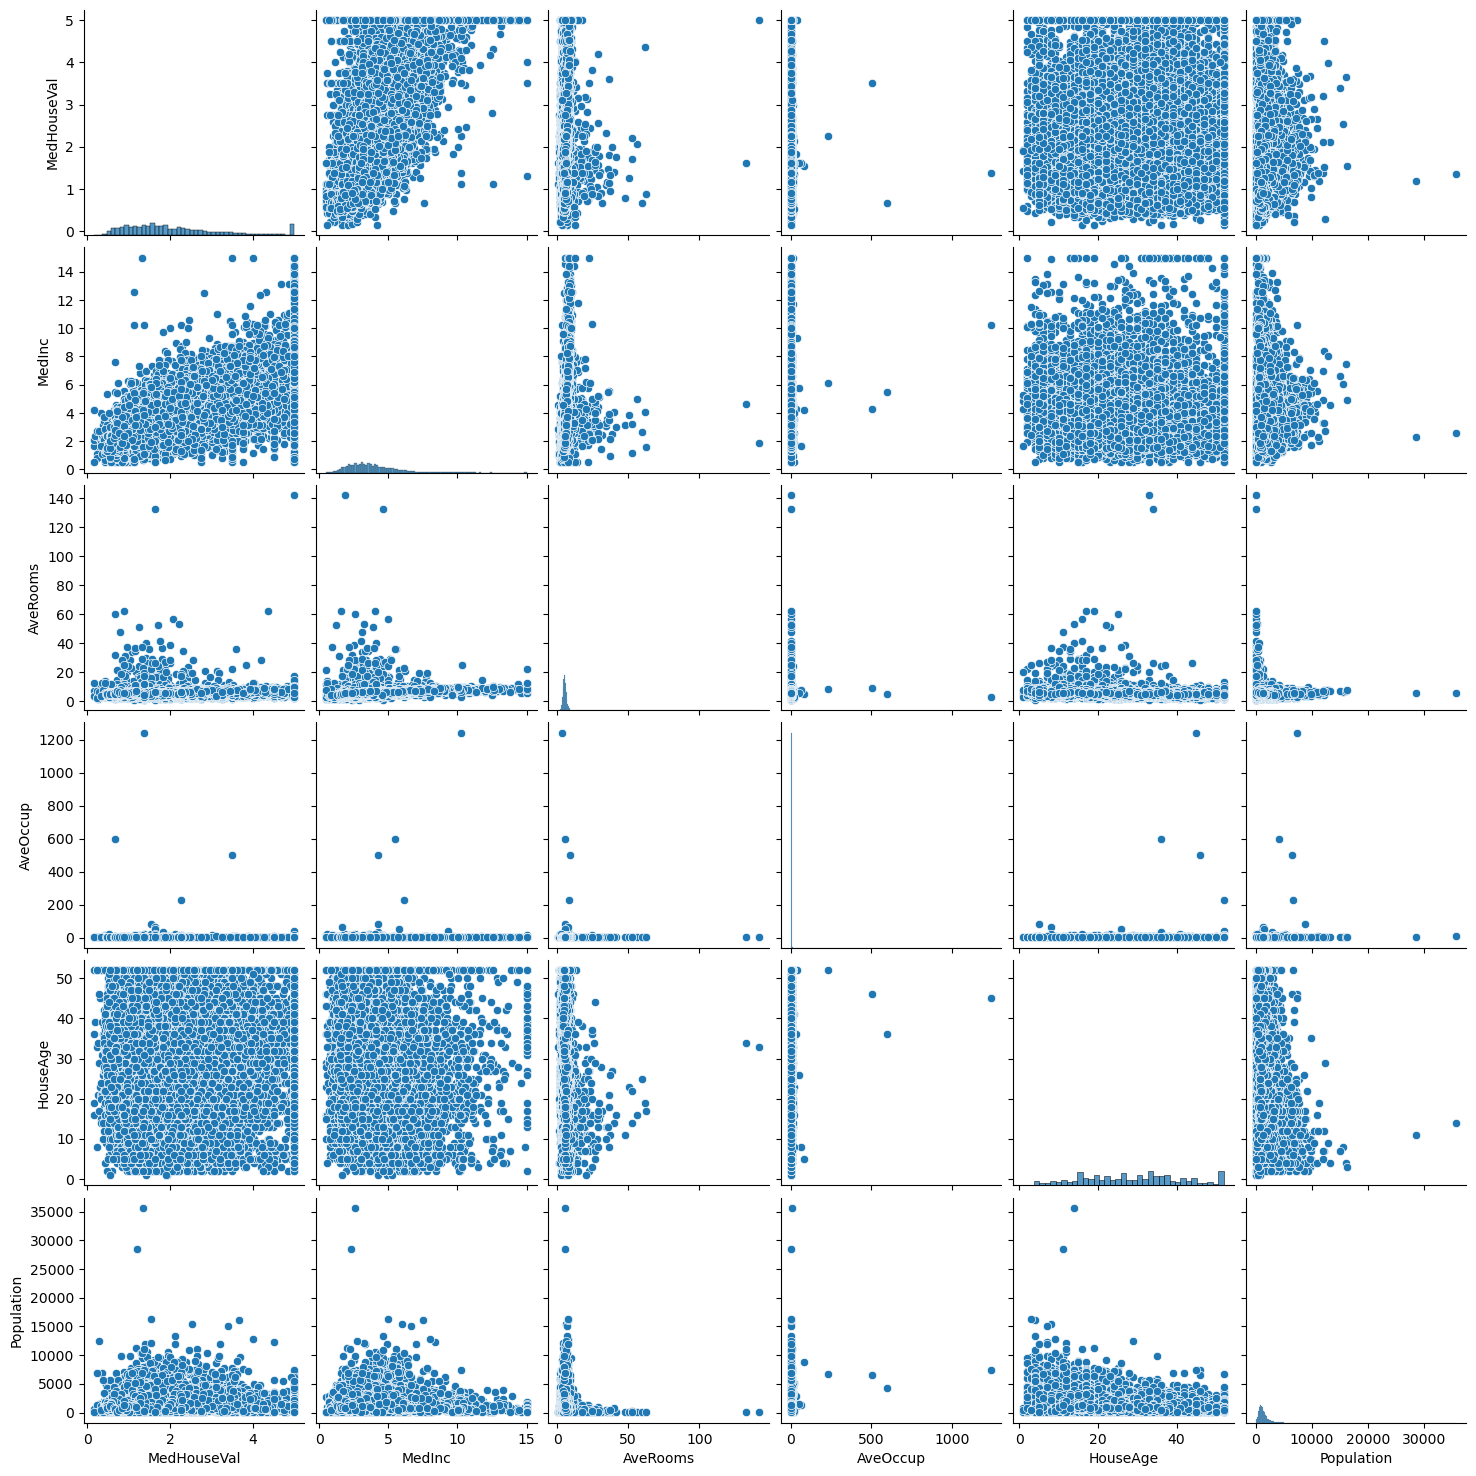

In [5]:
cols = ['MedHouseVal', 'MedInc', 'AveRooms', 'AveOccup', 'HouseAge', 'Population']

sns.pairplot(df[cols])
plt.show()

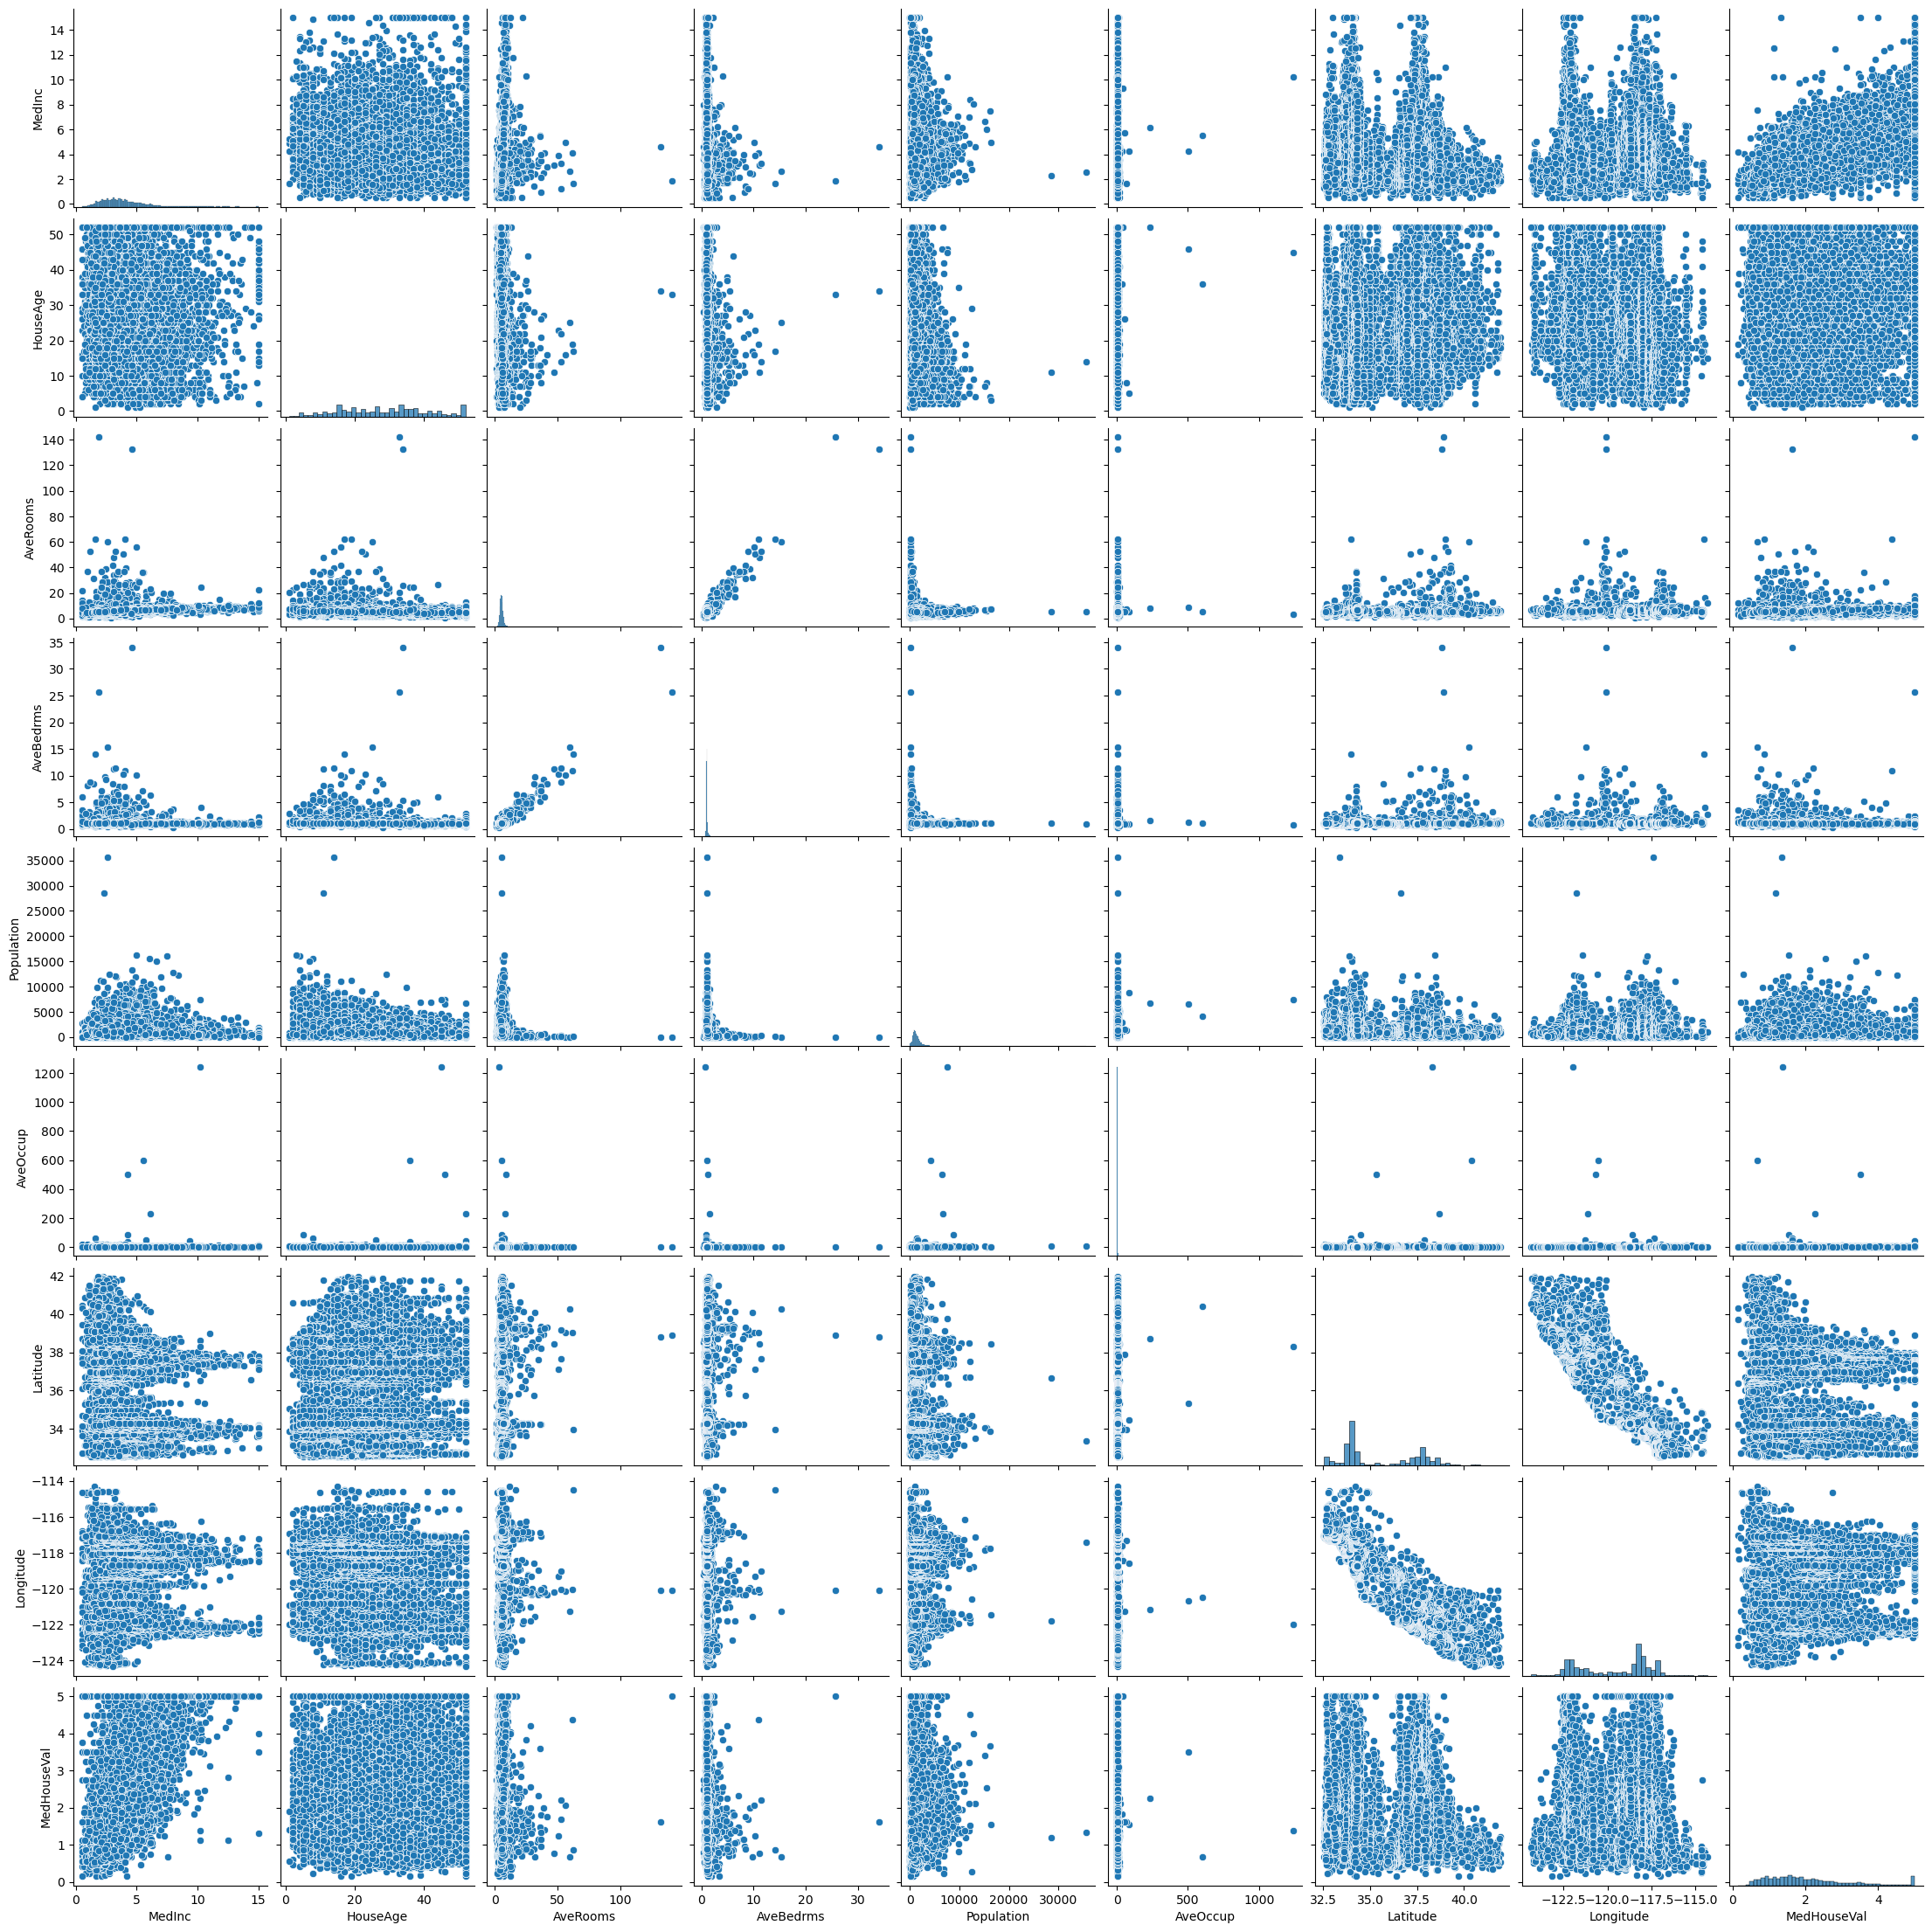

In [6]:
sns.pairplot(df)
plt.show()

pytorch로 선형 모델 학습

In [7]:
import torch                        # 텐서 및 기본 연산 지원
import torch.nn as nn               # 신경망 모델 구성 도구(nn.Linear, nn.Sequential 등)
import torch.nn.functional as f     # 다양한 함수형 연산 지원 (F.relu, F.mse_loss 등)
import torch.optim as optim         # 최적화 알고리즘 (SGD, Adam 등)

In [8]:
# df[cols]의 값을 numpy 배열로 변환 후에 이를 floatTensor() 형태로 변환했다.
data = torch.from_numpy(df[cols].values).float() 
print(data.shape)
print(data.size())

torch.Size([20640, 6])
torch.Size([20640, 6])


In [9]:
data

tensor([[4.5260e+00, 8.3252e+00, 6.9841e+00, 2.5556e+00, 4.1000e+01, 3.2200e+02],
        [3.5850e+00, 8.3014e+00, 6.2381e+00, 2.1098e+00, 2.1000e+01, 2.4010e+03],
        [3.5210e+00, 7.2574e+00, 8.2881e+00, 2.8023e+00, 5.2000e+01, 4.9600e+02],
        ...,
        [9.2300e-01, 1.7000e+00, 5.2055e+00, 2.3256e+00, 1.7000e+01, 1.0070e+03],
        [8.4700e-01, 1.8672e+00, 5.3295e+00, 2.1232e+00, 1.8000e+01, 7.4100e+02],
        [8.9400e-01, 2.3886e+00, 5.2547e+00, 2.6170e+00, 1.6000e+01, 1.3870e+03]])

In [10]:
x = data[:, :1] # 입력변수
y = data[:, :1] # 타겟값

x_min = x.min(dim=0, keepdim=True).values 
x_max = x.max(dim=0, keepdim=True).values 
x = (x - x_min) / (x_max - x_min) #x값을 0~1사이로 만들어주는 minmax Scaler와 동일한 효과

print(x.shape, y.shape)



torch.Size([20640, 1]) torch.Size([20640, 1])


모델 학습을 위한 하이퍼 파라미터 설정

In [11]:
n_epochs = 2000       #전체 학습 반복 횟수
learning_rate = 1e-3  #0.001  #학습률: 파마리터를 얼마나 빠르게 업데이트할지 결정한다.
print_interval = 100  #학습 중 손실(loss)을 출력할 간격 (몇 epoch마다 출력할지)


In [12]:
#모델 정의
model = nn.Linear(x.size(-1), y.size(-1)) #입력은 5개, 출력은 1(주택가격예측)

model

Linear(in_features=1, out_features=1, bias=True)

In [13]:
# optimizer(최적화 함수) :  모델의 파라미터를 자동으로 업데이트해준다. 
# .backward()와 optimizer.step()을 통해
optimizer = optim.SGD(     #확률적 경사 하강법 SGD
    model.parameters(),    #학습 대상이 되는 모델의 가중치와 편향
    lr=learning_rate       #학습률
)

In [14]:
for i in range(n_epochs):
    y_hat = model(x) # 순전파(출력값을 예측한다.)
    loss = f.mse_loss(y_hat, y)
    
    optimizer.zero_grad() # 기울기 초기화 작업
    loss.backward() #역전파
    
    optimizer.step()  #파라미터 업데이트
    
    if (i + 1) % print_interval == 0:     # 100번 돌때마다,
        print(f"Epoch {i + 1}: loss={loss:.4e}")    # 소수점 4자리의 지수표현식으로 표현

Epoch 100: loss=6.3293e+00
Epoch 200: loss=4.2595e+00
Epoch 300: loss=2.9555e+00
Epoch 400: loss=2.1321e+00
Epoch 500: loss=1.6102e+00
Epoch 600: loss=1.2776e+00
Epoch 700: loss=1.0638e+00
Epoch 800: loss=9.2459e-01
Epoch 900: loss=8.3233e-01
Epoch 1000: loss=7.6960e-01
Epoch 1100: loss=7.2548e-01
Epoch 1200: loss=6.9313e-01
Epoch 1300: loss=6.6825e-01
Epoch 1400: loss=6.4815e-01
Epoch 1500: loss=6.3113e-01
Epoch 1600: loss=6.1613e-01
Epoch 1700: loss=6.0248e-01
Epoch 1800: loss=5.8976e-01
Epoch 1900: loss=5.7770e-01
Epoch 2000: loss=5.6614e-01


torch.cat([y, y_hat], dim=1) : 예측값과 실제 값을 열방향으로 이어붙임   
detach().numpy() : 텐서는 기본적으로 계산 그래프가 같이 나오는데 이를 detach()로 분리하고, 넘파이 배열로 값만 반환


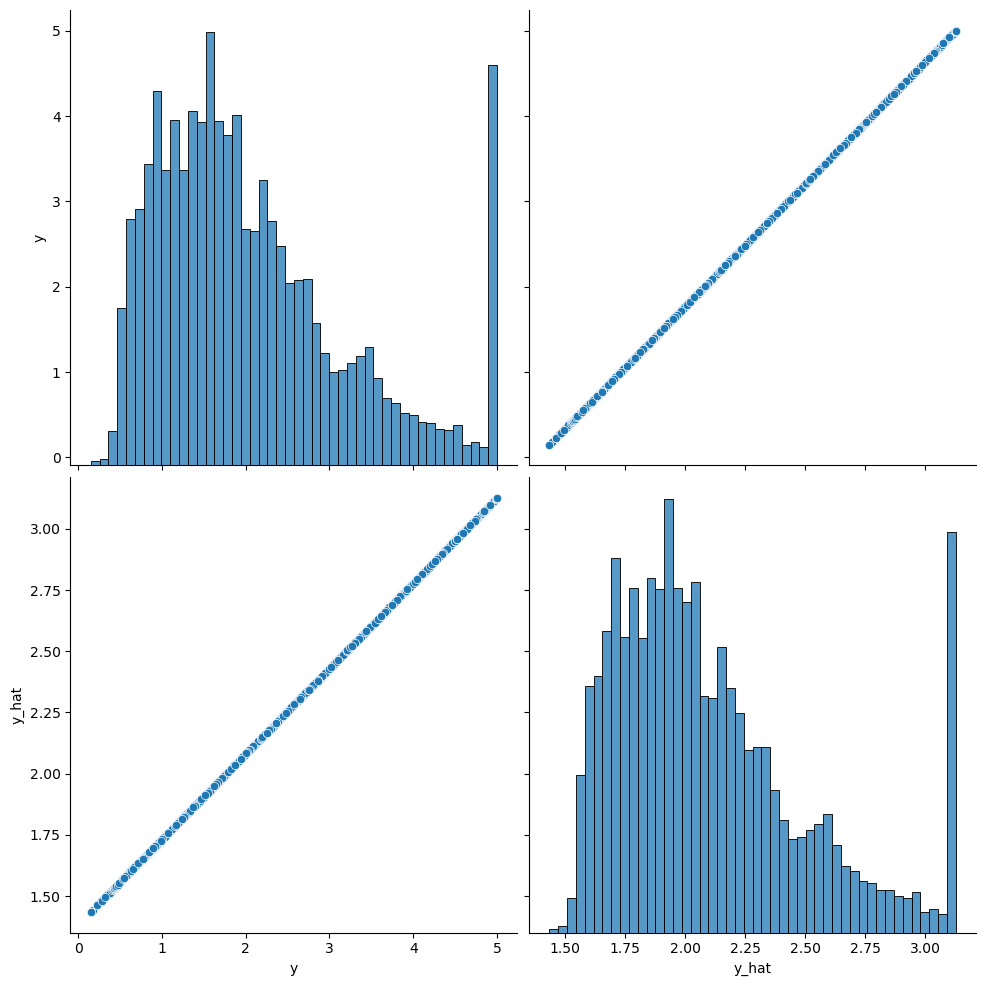

In [15]:
df = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach().numpy(), columns=["y", "y_hat"])

sns.pairplot(df, height=5)
plt.show()

선형 모델로 어느정도는 예측 가능했으나, 역시나 가격이 높은 줕캑에 대해서는 과소평가 하고 있다.